In [3]:
import os

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import plot_importance

In [4]:
DATA = os.path.abspath(os.path.join(os.getcwd(),"..","data","CICIDS2017_sample.csv"))
DATA

'/home/zorin/ML-IDS-System/data/CICIDS2017_sample.csv'

In [5]:
df = pd.read_csv(DATA)
df

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,4,2,0,37,0,31,6,18.500000,17.677670,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,142377,46,62,1325,105855,570,0,28.804348,111.407285,4344,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,118873,23,28,1169,45025,570,0,50.826087,156.137367,2896,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,143577,43,55,1301,107289,570,0,30.255814,115.178969,4344,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,143745,49,59,1331,110185,570,0,27.163265,108.067176,4344,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56656,234,2,2,64,232,32,32,32.000000,0.000000,116,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
56657,133288,2,2,94,482,47,47,47.000000,0.000000,241,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
56658,11507694,5,4,450,3525,450,0,90.000000,201.246118,3525,...,32,893.0,0.0,893,893,6503640.0,0.0,6503640,6503640,DoS
56659,11507707,8,6,416,11632,416,0,52.000000,147.078211,5792,...,32,897.0,0.0,897,897,6503122.0,0.0,6503122,6503122,DoS


In [6]:
df.Label.value_counts()

BENIGN          22731
DoS             19035
PortScan         7946
BruteForce       2767
WebAttack        2180
Bot              1966
Infiltration       36
Name: Label, dtype: int64

In [7]:
# Randomly sample instances from majority classes
df_minor = df[(df['Label']=='WebAttack')|(df['Label']=='Bot')|(df['Label']=='Infiltration')]
df_BENIGN = df[(df['Label']=='BENIGN')]
df_BENIGN = df_BENIGN.sample(n=None, frac=0.01, replace=False, weights=None, random_state=None, axis=0)
df_DoS = df[(df['Label']=='DoS')]
df_DoS = df_DoS.sample(n=None, frac=0.05, replace=False, weights=None, random_state=None, axis=0)
df_PortScan = df[(df['Label']=='PortScan')]
df_PortScan = df_PortScan.sample(n=None, frac=0.05, replace=False, weights=None, random_state=None, axis=0)
df_BruteForce = df[(df['Label']=='BruteForce')]
df_BruteForce = df_BruteForce.sample(n=None, frac=0.2, replace=False, weights=None, random_state=None, axis=0)

In [9]:
df_s = df_BENIGN.append(df_DoS).append(df_PortScan).append(df_BruteForce).append(df_minor)
df_s

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
16586,24641,1,1,69,85,69,69,69.00,0.000000,85,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
23853,51,1,1,0,0,0,0,0.00,0.000000,0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
23544,15936515,2,2,101,147,52,49,50.50,2.121320,79,...,20,30392.0,0.0,30392,30392,15844856.0,0.0,15844856,15844856,BENIGN
35210,21,13,0,650,0,50,50,50.00,0.000000,0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
16013,28353,1,1,58,74,58,58,58.00,0.000000,74,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31732,5005388,5,3,599,2021,599,0,119.80,267.880944,2021,...,32,0.0,0.0,0,0,0.0,0.0,0,0,WebAttack
31735,5016759,5,5,599,4149,599,0,119.80,267.880944,2701,...,32,0.0,0.0,0,0,0.0,0.0,0,0,WebAttack
31738,5009163,4,4,599,2021,599,0,149.75,299.500000,2021,...,32,0.0,0.0,0,0,0.0,0.0,0,0,WebAttack
31739,73,1,1,0,0,0,0,0.00,0.000000,0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,WebAttack


In [15]:
df_s = df_s.sort_index()
df = df_s
df_s

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
19,118361735,26,34,941,36109,206,0,36.192308,60.795407,2860,...,20,201183.0,161827.0437,315612,86754,58900000.0,36576.51247,59000000,58900000,BENIGN
45,2015383,3,0,18,0,6,6,6.000000,0.000000,0,...,20,0.0,0.0000,0,0,0.0,0.00000,0,0,BENIGN
167,232,2,2,78,110,39,39,39.000000,0.000000,55,...,20,0.0,0.0000,0,0,0.0,0.00000,0,0,BENIGN
213,6619545,4,0,24,0,6,6,6.000000,0.000000,0,...,20,655.0,0.0000,655,655,6618890.0,0.00000,6618890,6618890,DoS
229,81363729,4,0,24,0,6,6,6.000000,0.000000,0,...,20,3004.0,0.0000,3004,3004,81400000.0,0.00000,81400000,81400000,DoS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56262,107640365,2,1,288,6,288,0,144.000000,203.646753,6,...,32,0.0,0.0000,0,0,108000000.0,0.00000,108000000,108000000,DoS
56522,11238394,7,5,276,11632,276,0,39.428571,104.318195,10184,...,32,905.0,0.0000,905,905,6233898.0,0.00000,6233898,6233898,DoS
56532,5008472,5,4,398,3525,398,0,79.600000,177.991011,3525,...,32,0.0,0.0000,0,0,0.0,0.00000,0,0,DoS
56641,21,1,1,6,6,6,6,6.000000,0.000000,6,...,20,0.0,0.0000,0,0,0.0,0.00000,0,0,BENIGN


In [16]:
numeric_features = df.dtypes[df.dtypes != 'object'].index
df[numeric_features] = df[numeric_features].apply(
    lambda x: (x - x.min()) / (x.max()-x.min()))
# Fill empty values by 0
df = df.fillna(0)

In [24]:
labelencoder = LabelEncoder()
df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:, -1])
X = df.drop(['Label'],axis=1).values
y = df.iloc[:, -1].values.reshape(-1,1)
y=np.ravel(y)
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 0,stratify = y)

In [25]:
X_train.shape

(5048, 77)

In [26]:
pd.Series(y_train).value_counts()

6    1744
1    1573
3     761
2     442
5     317
0     182
4      29
dtype: int64

In [27]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(n_jobs=-1,sampling_strategy={4:1500}) # Create 1500 samples for the minority class "4"

In [29]:
X_train, y_train = smote.fit_resample(X_train, y_train)

In [30]:
pd.Series(y_train).value_counts()

6    1744
1    1573
4    1500
3     761
2     442
5     317
0     182
dtype: int64

Accuracy of DT: 0.9873317498020586
Precision of DT: 0.9868992186814501
Recall of DT: 0.9873317498020586
F1-score of DT: 0.9869976991944944
              precision    recall  f1-score   support

           0       0.88      0.80      0.84        45
           1       0.99      0.99      0.99       393
           2       1.00      1.00      1.00       111
           3       0.98      1.00      0.99       191
           4       0.83      0.71      0.77         7
           5       1.00      0.99      0.99        80
           6       0.99      1.00      1.00       436

    accuracy                           0.99      1263
   macro avg       0.95      0.93      0.94      1263
weighted avg       0.99      0.99      0.99      1263



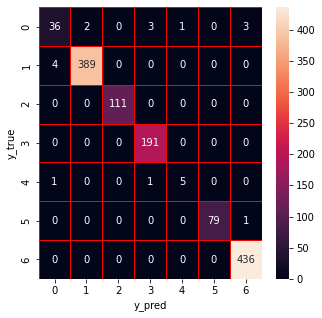

In [31]:
# Decision tree training and prediction
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(X_train,y_train) 
dt_score=dt.score(X_test,y_test)
y_predict=dt.predict(X_test)
y_true=y_test
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [33]:
dt_train=dt.predict(X_train)
dt_test=dt.predict(X_test)

Accuracy of RF: 0.9889152810768013
Precision of RF: 0.9887200390915707
Recall of RF: 0.9889152810768013
F1-score of RF: 0.9887795532309822
              precision    recall  f1-score   support

           0       0.89      0.87      0.88        45
           1       1.00      0.99      1.00       393
           2       0.99      1.00      1.00       111
           3       0.99      0.99      0.99       191
           4       0.83      0.71      0.77         7
           5       1.00      0.99      0.99        80
           6       0.99      1.00      0.99       436

    accuracy                           0.99      1263
   macro avg       0.96      0.94      0.94      1263
weighted avg       0.99      0.99      0.99      1263



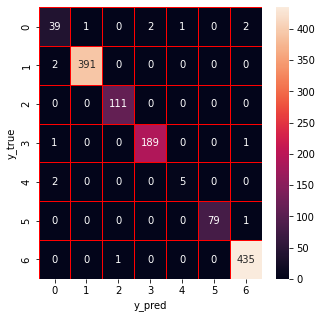

In [34]:
# Random Forest training and prediction
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train,y_train) 
rf_score=rf.score(X_test,y_test)
y_predict=rf.predict(X_test)
y_true=y_test
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [35]:
rf_train=rf.predict(X_train)
rf_test=rf.predict(X_test)

Accuracy of ET: 0.9889152810768013
Precision of ET: 0.9891412939201345
Recall of ET: 0.9889152810768013
F1-score of ET: 0.9888708439390134
              precision    recall  f1-score   support

           0       0.87      0.91      0.89        45
           1       0.99      0.99      0.99       393
           2       0.98      1.00      0.99       111
           3       0.99      0.99      0.99       191
           4       1.00      0.71      0.83         7
           5       1.00      0.99      0.99        80
           6       0.99      0.99      0.99       436

    accuracy                           0.99      1263
   macro avg       0.98      0.94      0.96      1263
weighted avg       0.99      0.99      0.99      1263



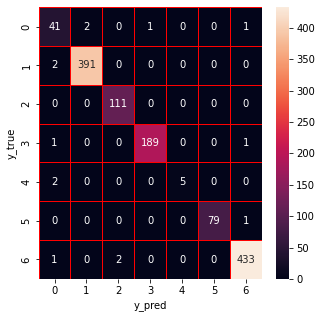

In [36]:
# Extra trees training and prediction
et = ExtraTreesClassifier(random_state = 0)
et.fit(X_train,y_train) 
et_score=et.score(X_test,y_test)
y_predict=et.predict(X_test)
y_true=y_test
print('Accuracy of ET: '+ str(et_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of ET: '+(str(precision)))
print('Recall of ET: '+(str(recall)))
print('F1-score of ET: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [37]:
et_train=et.predict(X_train)
et_test=et.predict(X_test)

/home/zorin/ML-IDS-System/venv/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:09:35] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of XGBoost: 0.9889152810768013
Precision of XGBoost: 0.9885566648403873
Recall of XGBoost: 0.9889152810768013
F1-score of XGBoost: 0.9885875223071378
              precision    recall  f1-score   support

           0       0.93      0.82      0.87        45
           1       1.00      0.99      1.00       393
           2       0.99      1.00      1.00       111
           3       0.98      0.99      0.99       191
           4       0.83      0.71      0.77         7
           5       0.99      0.99      0.99        80
           6       0.99      1.00      1.00       436

    accuracy                           0.99      1263
   macro avg       0.96      0.93      0.94      1263
weighted avg       0.99      0.99      0.99   

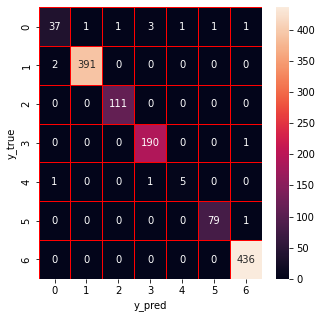

In [41]:
# XGboost training and prediction
xg = xgb.XGBClassifier(n_estimators = 10)
xg.fit(X_train,y_train)
xg_score=xg.score(X_test,y_test)
y_predict=xg.predict(X_test)
y_true=y_test
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [42]:
xg_train=xg.predict(X_train)
xg_test=xg.predict(X_test)

In [45]:
# Save the feature importance lists generated by four tree-based algorithms
dt_feature = dt.feature_importances_
rf_feature = rf.feature_importances_
et_feature = et.feature_importances_
xgb_feature = xg.feature_importances_

xgb_feature

array([1.42986914e-02, 3.35557759e-03, 2.14574393e-02, 5.25224209e-02,
       2.45101936e-02, 1.01969503e-01, 1.56907452e-04, 8.50517419e-04,
       8.24955106e-03, 3.10716173e-03, 2.04482973e-02, 7.33506959e-03,
       4.61379215e-02, 0.00000000e+00, 0.00000000e+00, 7.20861694e-03,
       4.41551134e-02, 1.05374686e-01, 4.65657940e-04, 2.52620666e-03,
       2.13212679e-05, 3.26637200e-05, 0.00000000e+00, 1.41740954e-02,
       8.23066730e-05, 3.41076963e-03, 5.57856224e-02, 0.00000000e+00,
       6.63681189e-03, 9.58771911e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.44779754e-02, 0.00000000e+00, 1.86150556e-03,
       3.55486609e-02, 0.00000000e+00, 1.81801766e-01, 1.39620795e-03,
       1.51206797e-03, 5.12981880e-03, 7.33377645e-03, 0.00000000e+00,
       0.00000000e+00, 4.12260629e-02, 0.00000000e+00, 1.71970595e-02,
       0.00000000e+00, 0.00000000e+00, 2.92557030e-04, 1.18084075e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [46]:
# calculate the average importance value of each feature
avg_feature = (dt_feature + rf_feature + et_feature + xgb_feature)/4

In [48]:
feature=(df.drop(['Label'],axis=1)).columns.values
print ("Features sorted by their score:")
f_list = sorted(zip(map(lambda x: round(x, 4), avg_feature), feature), reverse=True)
f_list

Features sorted by their score:


[(0.1072, 'Init_Win_bytes_backward'),
 (0.0824, 'Total Length of Fwd Packets'),
 (0.073, 'min_seg_size_forward'),
 (0.0612, 'Flow IAT Max'),
 (0.0568, 'Max Packet Length'),
 (0.0352, 'Fwd Packet Length Max'),
 (0.0297, 'Init_Win_bytes_forward'),
 (0.0219, 'Bwd Packets/s'),
 (0.021, 'Packet Length Mean'),
 (0.0205, 'Bwd Packet Length Mean'),
 (0.0204, 'Flow IAT Std'),
 (0.0202, 'PSH Flag Count'),
 (0.0187, 'Bwd Packet Length Min'),
 (0.0175, 'Bwd Packet Length Std'),
 (0.0167, 'Fwd IAT Total'),
 (0.0163, 'Bwd IAT Min'),
 (0.0159, 'Bwd IAT Std'),
 (0.0155, 'Flow Duration'),
 (0.0155, 'Average Packet Size'),
 (0.0142, 'Fwd Header Length'),
 (0.0141, 'Bwd IAT Total'),
 (0.0135, 'Total Length of Bwd Packets'),
 (0.013, 'Total Backward Packets'),
 (0.0122, 'Subflow Fwd Packets'),
 (0.0122, 'Avg Bwd Segment Size'),
 (0.012, 'Fwd PSH Flags'),
 (0.0115, 'Fwd Packet Length Mean'),
 (0.0113, 'Fwd IAT Max'),
 (0.0113, 'Bwd Packet Length Max'),
 (0.0107, 'Fwd Packet Length Std'),
 (0.0106, 'URG Fla

In [49]:
# Select the important features from top-importance to bottom-importance until the accumulated importance reaches 0.9 (out of 1)
Sum = 0
fs = []
for i in range(0, len(f_list)):
    Sum = Sum + f_list[i][0]
    fs.append(f_list[i][1])
    if Sum>=0.9:
        break 

In [51]:
X_fs = df[fs].values
X_train, X_test, y_train, y_test = train_test_split(X_fs,y, train_size = 0.8, test_size = 0.2, random_state = 0,stratify = y)
X_train.shape

(5048, 42)

In [52]:
pd.Series(y_train).value_counts()

6    1744
1    1573
3     761
2     442
5     317
0     182
4      29
dtype: int64

In [53]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(n_jobs=-1,sampling_strategy={4:1500})

In [55]:
X_train, y_train = smote.fit_resample(X_train, y_train)
pd.Series(y_train).value_counts()

6    1744
1    1573
4    1500
3     761
2     442
5     317
0     182
dtype: int64

/home/zorin/ML-IDS-System/venv/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:19:42] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of XGBoost: 0.9881235154394299
Precision of XGBoost: 0.9877904108802331
Recall of XGBoost: 0.9881235154394299
F1-score of XGBoost: 0.987714863849642
              precision    recall  f1-score   support

           0       0.92      0.78      0.84        45
           1       1.00      0.99      1.00       393
           2       0.97      1.00      0.99       111
           3       0.98      1.00      0.99       191
           4       0.71      0.71      0.71         7
           5       0.99      0.99      0.99        80
           6       1.00      1.00      1.00       436

    accuracy                           0.99      1263
   macro avg       0.94      0.92      0.93      1263
weighted avg       0.99      0.99      0.99    

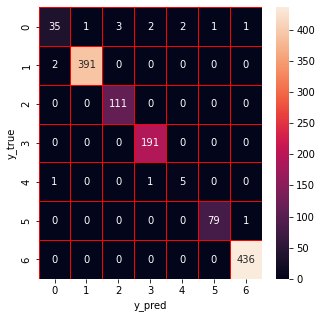

In [56]:
xg = xgb.XGBClassifier(n_estimators = 10)
xg.fit(X_train,y_train)
xg_score=xg.score(X_test,y_test)
y_predict=xg.predict(X_test)
y_true=y_test
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [57]:
xg_train=xg.predict(X_train)
xg_test=xg.predict(X_test)